<a href="https://colab.research.google.com/github/RucheshPatel/Experiments-on-AI-ML/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataframe
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
df.shape


(20640, 9)

In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.drop(['Population', 'AveOccup'], axis=1, inplace=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Latitude     20640 non-null  float64
 5   Longitude    20640 non-null  float64
 6   MedHouseVal  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,41.950000,-114.310000,5.000010


In [ ]:
# view the labels in the variable

df['MedInc'].unique()

array([8.3252, 8.3014, 7.2574, ..., 2.3598, 2.3661, 2.0943])

In [ ]:
# view how many different types of variables are there

len(df['MedInc'].unique())

12928

In [ ]:
# view the labels in the variable

df['HouseAge'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [ ]:
# view how many different types of variables are there

len(df['HouseAge'].unique())

52

In [ ]:
# view the labels in the variable

df['AveRooms'].unique()

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698])

In [ ]:
# view how many different types of variables are there

len(df['AveRooms'].unique())

19392

In [ ]:
df.drop(['MedInc', 'HouseAge'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AveRooms     20640 non-null  float64
 1   AveBedrms    20640 non-null  float64
 2   Latitude     20640 non-null  float64
 3   Longitude    20640 non-null  float64
 4   MedHouseVal  20640 non-null  float64
dtypes: float64(5)
memory usage: 806.4 KB


In [ ]:
df.head()

,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
0,6.984127,1.023810,37.88,-122.23,4.526
1,6.238137,0.971880,37.86,-122.22,3.585
2,8.288136,1.073446,37.85,-122.24,3.521
3,5.817352,1.073059,37.85,-122.25,3.413
4,6.281853,1.081081,37.85,-122.25,3.422


In [ ]:
X = df

y = df['AveRooms']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['AveRooms'] = le.fit_transform(X['AveRooms'])

y = le.transform(y)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AveRooms     20640 non-null  int64  
 1   AveBedrms    20640 non-null  float64
 2   Latitude     20640 non-null  float64
 3   Longitude    20640 non-null  float64
 4   MedHouseVal  20640 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 806.4 KB


In [ ]:
X.head()


,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
0,17422,1.023810,37.88,-122.23,4.526
1,15292,0.971880,37.86,-122.22,3.585
2,18851,1.073446,37.85,-122.24,3.521
3,13297,1.073059,37.85,-122.25,3.413
4,15461,1.081081,37.85,-122.25,3.422


In [ ]:
cols = X.columns


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])


In [ ]:
X.head()


,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
0,0.898458,0.020469,0.567481,0.211155,0.902266
1,0.788613,0.018929,0.565356,0.212151,0.708247
2,0.972152,0.021940,0.564293,0.210159,0.695051
3,0.685730,0.021929,0.564293,0.209163,0.672783
4,0.797329,0.022166,0.564293,0.209163,0.674638


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_


array([[0.46261325, 0.02207658, 0.14629295, 0.63330494, 0.41284039],
       [0.54748816, 0.02336688, 0.57227089, 0.26598238, 0.37250229]])

In [ ]:
kmeans.inertia_


3103.487211727589

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1 out of 20640 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


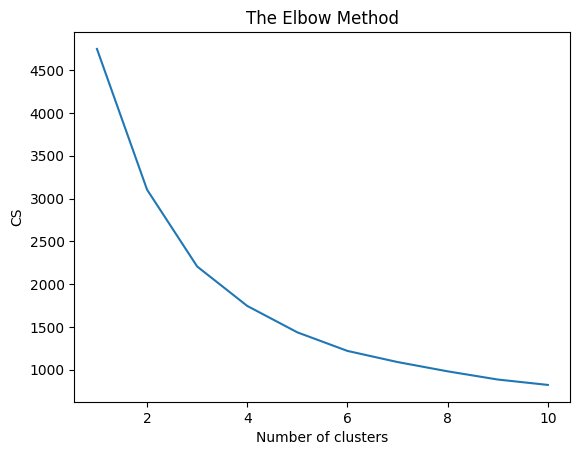

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 20640 samples were correctly labeled.
Accuracy score: 0.00


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 20640 samples were correctly labeled.
Accuracy score: 0.00


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 20640 samples were correctly labeled.
Accuracy score: 0.00
